# Machine Learning 

## Candidate Number: 178621 & Kaggle Team Name: Kristina Harper

### Code File 2

This notebook was primarily used for model and hyper-parameter analysis through the loading of the best model from a pickle file (which was generated and saved in the previous file). Best model results were also reproduced here, and the resulting model saved as a pickle file which can be accessed from the submission folder. 

The notebook was used to test the effect of using train vs additional data, the incorporation of confidence measures, and the application of sample weighting during model fitting. It also shows how plots for Validation and Learning Curves were generated. 

In [1]:
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# Packages for visuals
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

# Allows charts to appear in the notebook
%matplotlib inline

# Pickle package, collections for model and feature selection and preprocessing
import pickle
import collections
from collections import defaultdict,Counter
import csv
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import KFold
from sklearn.feature_selection import f_regression
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import ShuffleSplit
from sklearn.externals import joblib

In [2]:
# Create a dataframe from the csv data
trainData = pd.read_csv('training.csv')
# Create a dataframe from the csv data
testData = pd.read_csv('testing.csv')

### Train-only data

In [42]:
# Create train-data-only set to implement with confidence measure and sample weighting. Test based on learning curve output
trainConfidence = confidenceMeasures[0:456]
trainData['confidence']=trainConfidence['confidence']

# Create training and validation sets for the data for manual training and testing once grid-search has been performed 
# and the optimal model returned. 
TrainOnly,ValOnly = train_test_split(trainData)

# Run to isolate predictions from train and test data splits
cvTrainOnlyPreds = TrainOnly.prediction
cvValOnlyPreds = ValOnly.prediction

# Drop predictions to generate only train and test features with confidence column still there. 
cvTrainOnlyFeatsOnly = TrainOnly.drop('prediction',axis=1)
cvValOnlyFeatsOnly = ValOnly.drop('prediction',axis=1)

# Get training and validation set confidence
cvTrainConf = TrainOnly.confidence
cvValConf = ValOnly.confidence

# Drop the training and validation confidence columns
cvTrainOnlyFeatsOnly = cvTrainOnlyFeatsOnly.drop('confidence',axis=1)
cvValOnlyFeatsOnly = cvValOnlyFeatsOnly.drop('confidence',axis=1)
cvTrainOnlyFeatsOnly

,ID,CNNs,CNNs.1,CNNs.2,CNNs.3,CNNs.4,CNNs.5,CNNs.6,CNNs.7,CNNs.8,...,GIST.502,GIST.503,GIST.504,GIST.505,GIST.506,GIST.507,GIST.508,GIST.509,GIST.510,GIST.511
150,151,0.000000,0.000000,0.00000,0.000000,0.000000,0.790480,0.293510,0.000000,0.000000,...,0.027499,0.012305,0.001984,0.011776,0.013447,0.015256,0.002817,0.013899,0.014731,0.024626
90,91,0.207670,0.296390,0.26231,0.000000,1.165600,0.000000,0.934890,1.582800,0.494140,...,0.002056,0.004614,0.018302,0.003785,0.007251,0.034327,0.032091,0.041741,0.012131,0.020021
160,161,0.000000,0.000000,0.30036,0.624120,0.635850,0.540320,0.000000,0.585950,0.312200,...,0.041224,0.031253,0.010014,0.024429,0.010149,0.014540,0.010386,0.013027,0.016337,0.012607
421,422,0.526000,0.946020,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.070216,0.035306,0.003147,0.042423,0.039359,0.033500,0.004026,0.028007,0.048307,0.032081
347,348,0.000000,0.000000,0.00000,1.397700,0.000000,0.000000,0.000000,0.000000,0.552690,...,0.019335,0.031894,0.037818,0.027405,0.024909,0.025904,0.046541,0.023471,0.016662,0.016685
168,169,0.413750,0.349790,0.00000,0.000000,0.624680,0.152240,0.865150,0.881960,0.487070,...,0.034734,0.030654,0.023939,0.040641,0.060400,0.018152,0.031617,0.041843,0.074206,0.065885
305,306,1.965900,0.000000,0.74321,0.000000,0.847320,0.000000,0.615340,0.287150,0.000000,...,0.053035,0.036273,0.033264,0.042212,0.053773,0.025613,0.027976,0.066505,0.056279,0.054024
239,240,0.000000,0.000000,0.00000,0.214830,0.000000,0.000000,0.000000,0.574510,0.332980,...,0.016528,0.015273,0.043018,0.038102,0.040556,0.034230,0.041770,0.048593,0.073567,0.048710
2,3,0.000000,0.000000,0.00000,0.283390,0.000000,0.749490,0.062996,1.600200,0.740900,...,0.022123,0.023006,0.025229,0.043951,0.032144,0.018992,0.033419,0.030518,0.022346,0.014875
164,165,0.175820,0.000000,0.00000,1.395000,0.000000,1.268600,0.000000,0.000000,0.000000,...,0.057409,0.024334,0.008232,0.033340,0.046234,0.009477,0.043903,0.037311,0.022888,0.011368


### Pre-Processing 

In [49]:
# Preprocessing steps: scaling, PCA
scaler = StandardScaler()
scaler.fit(cvTrainFeatsOnly)

# Apply transform to training and test set
scaledTrainCV = scaler.transform(cvTrainFeatsOnly)
scaledValCV = scaler.transform(cvValFeatsOnly)
scaledTestData = scaler.transform(testData)

# Make a PCA model with 200 components. Test against 0.95% explained variance. 
pca = PCA(n_components=200)
#pca = PCA(0.95)

# Fit PCA on training set. 
pca.fit(scaledTrainCV)

# Find how many components chosen with pca.n_components_. 

# Apply pca mapping to training, validation, and test set. 
pcaTrainCV = pca.transform(scaledTrainCV)
pcaValCV = pca.transform(scaledValCV)
pcaTestCV = pca.transform(scaledTestData)

In [51]:
#pca.n_components_
len(pcaTrainCV)

3420

In [27]:
#pca2 = PCA(n_components = 200)
#newTrainPCA = pca2.fit(scaledTrainCV)
pcaTrainCV = pca.transform(scaledTrainCV)
pcaValCV = pca.transform(scaledValCV)
pcaTestCV = pca.transform(scaledTestData)

In [20]:
#pca.n_components_
sum(pca.explained_variance_ratio_)

0.65581147042996069

In [29]:
len(cvTrainPreds)

3420

### Train SVM model

In [38]:
# Reimplement best model with different scaler. 
model10 = svm.SVC(C = 1,kernel='rbf',gamma = 0.0001,class_weight={0:0.5714,1:0.4286},verbose=2)
model10.fit(pcaTrainCV,cvTrainPreds,sample_weight=cvTrainConf)

newPredictions = model10.predict(pcaValCV)
print('newPred: ',newPredictions)
print('Score: ',model10.score(pcaValCV,cvValPreds))

testPredictions10 = model10.predict(pcaTestCV)
print(testPredictions10)

[LibSVM]newPred:  [1 1 0 ..., 1 1 1]
Score:  0.833333333333
[0 1 0 ..., 1 1 0]


In [62]:
# Compare no class weight
model13 = svm.SVC(C = 1,kernel='rbf',gamma = 0.0001,class_weight={0:0.5714,1:0.4286},verbose=2)
model13.fit(pcaTrainCV2,cvTrainPreds)

newPredictions = model13.predict(pcaValCV)
print('newPred: ',newPredictions)
print('Score: ',model13.score(pcaValCV,cvValPreds))

testPredictions13 = model13.predict(pcaTestCV)
print(testPredictions12)

[LibSVM]newPred:  [1 0 1 ..., 1 1 0]
Score:  0.814912280702
[0 1 0 ..., 1 1 0]


In [46]:
# Write to csv file
predDF = pd.DataFrame(testPredictions10)
predDF.index = predDF.index+1
predDF.to_csv('testPredictions15.csv')

### Incorporate Additional Data and Confidence Values

In [3]:
# Load confidence measures and additional training data
confidenceMeasures = pd.read_csv('annotation_confidence.csv')
#confidenceMeasures
#trainConfidence = confidenceMeasures[0:456]
additionalTraining = pd.read_csv('additional_training.csv')

allData = trainData.append(additionalTraining) # code to append two dataframes.
allData

,ID,CNNs,CNNs.1,CNNs.2,CNNs.3,CNNs.4,CNNs.5,CNNs.6,CNNs.7,CNNs.8,...,GIST.503,GIST.504,GIST.505,GIST.506,GIST.507,GIST.508,GIST.509,GIST.510,GIST.511,prediction
0,1,0.449180,0.000000,0.000000,0.00000,0.000000,0.110520,1.317000,0.000000,1.434300,...,0.005435,0.002507,0.037413,0.047131,0.004175,0.003744,0.037672,0.071448,0.013265,1
1,2,0.000000,0.000000,0.000000,0.00000,0.000000,0.631840,0.000000,1.838800,0.495900,...,0.033147,0.008112,0.004126,0.014677,0.048980,0.011394,0.012629,0.033668,0.048248,1
2,3,0.000000,0.000000,0.000000,0.28339,0.000000,0.749490,0.062996,1.600200,0.740900,...,0.023006,0.025229,0.043951,0.032144,0.018992,0.033419,0.030518,0.022346,0.014875,1
3,4,0.311980,0.244520,0.212100,0.97855,0.000000,1.319800,0.000000,0.000000,0.000000,...,0.033687,0.066910,0.036916,0.029357,0.017351,0.020543,0.015300,0.016477,0.019715,0
4,5,0.000000,0.285600,0.067485,0.00000,0.441400,0.000000,0.539600,0.000000,0.091620,...,0.014306,0.023978,0.019834,0.029528,0.029826,0.027222,0.032496,0.026370,0.028569,0
5,6,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.309600,0.812570,0.000000,...,0.006797,0.030276,0.037172,0.019828,0.010732,0.053016,0.041817,0.012208,0.007540,1
6,7,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.488860,0.826320,0.368780,...,0.027909,0.024642,0.011153,0.022865,0.016119,0.028122,0.017835,0.017970,0.016795,1
7,8,0.000000,0.000000,0.032417,0.00000,0.132620,0.531190,0.441750,0.000000,1.615700,...,0.008367,0.009989,0.036080,0.026765,0.009598,0.006808,0.033180,0.026256,0.017007,1
8,9,0.233590,0.000000,0.000000,0.00000,0.000000,0.000000,0.130800,0.000000,0.000000,...,0.041533,0.004420,0.053275,0.045695,0.015790,0.001562,0.025589,0.048539,0.027832,0
9,10,0.267510,0.000000,0.000000,0.61004,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.025733,0.025188,0.027871,0.027146,0.028338,0.021368,0.042870,0.038707,0.017392,1


### Imputation

In [4]:
# Fill Data with the mean from each column - Simple Imputation
meanData = allData.mean()
allData = allData.fillna(meanData)
allData 

,ID,CNNs,CNNs.1,CNNs.2,CNNs.3,CNNs.4,CNNs.5,CNNs.6,CNNs.7,CNNs.8,...,GIST.503,GIST.504,GIST.505,GIST.506,GIST.507,GIST.508,GIST.509,GIST.510,GIST.511,prediction
0,1,0.449180,0.000000,0.000000,0.000000,0.000000,0.110520,1.317000,0.000000,1.434300,...,0.005435,0.002507,0.037413,0.047131,0.004175,0.003744,0.037672,0.071448,0.013265,1
1,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.631840,0.000000,1.838800,0.495900,...,0.033147,0.008112,0.004126,0.014677,0.048980,0.011394,0.012629,0.033668,0.048248,1
2,3,0.000000,0.000000,0.000000,0.283390,0.000000,0.749490,0.062996,1.600200,0.740900,...,0.023006,0.025229,0.043951,0.032144,0.018992,0.033419,0.030518,0.022346,0.014875,1
3,4,0.311980,0.244520,0.212100,0.978550,0.000000,1.319800,0.000000,0.000000,0.000000,...,0.033687,0.066910,0.036916,0.029357,0.017351,0.020543,0.015300,0.016477,0.019715,0
4,5,0.000000,0.285600,0.067485,0.000000,0.441400,0.000000,0.539600,0.000000,0.091620,...,0.014306,0.023978,0.019834,0.029528,0.029826,0.027222,0.032496,0.026370,0.028569,0
5,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.309600,0.812570,0.000000,...,0.006797,0.030276,0.037172,0.019828,0.010732,0.053016,0.041817,0.012208,0.007540,1
6,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.488860,0.826320,0.368780,...,0.027909,0.024642,0.011153,0.022865,0.016119,0.028122,0.017835,0.017970,0.016795,1
7,8,0.000000,0.000000,0.032417,0.000000,0.132620,0.531190,0.441750,0.000000,1.615700,...,0.008367,0.009989,0.036080,0.026765,0.009598,0.006808,0.033180,0.026256,0.017007,1
8,9,0.233590,0.000000,0.000000,0.000000,0.000000,0.000000,0.130800,0.000000,0.000000,...,0.041533,0.004420,0.053275,0.045695,0.015790,0.001562,0.025589,0.048539,0.027832,0
9,10,0.267510,0.000000,0.000000,0.610040,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.025733,0.025188,0.027871,0.027146,0.028338,0.021368,0.042870,0.038707,0.017392,1


In [5]:
# Add confidence label to new all features dataframe, then can split all into training and validation sets. 
#confidenceMeasures
allData['confidence'] = confidenceMeasures['confidence']
allData

,ID,CNNs,CNNs.1,CNNs.2,CNNs.3,CNNs.4,CNNs.5,CNNs.6,CNNs.7,CNNs.8,...,GIST.504,GIST.505,GIST.506,GIST.507,GIST.508,GIST.509,GIST.510,GIST.511,prediction,confidence
0,1,0.449180,0.000000,0.000000,0.000000,0.000000,0.110520,1.317000,0.000000,1.434300,...,0.002507,0.037413,0.047131,0.004175,0.003744,0.037672,0.071448,0.013265,1,1.00
1,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.631840,0.000000,1.838800,0.495900,...,0.008112,0.004126,0.014677,0.048980,0.011394,0.012629,0.033668,0.048248,1,0.66
2,3,0.000000,0.000000,0.000000,0.283390,0.000000,0.749490,0.062996,1.600200,0.740900,...,0.025229,0.043951,0.032144,0.018992,0.033419,0.030518,0.022346,0.014875,1,1.00
3,4,0.311980,0.244520,0.212100,0.978550,0.000000,1.319800,0.000000,0.000000,0.000000,...,0.066910,0.036916,0.029357,0.017351,0.020543,0.015300,0.016477,0.019715,0,0.66
4,5,0.000000,0.285600,0.067485,0.000000,0.441400,0.000000,0.539600,0.000000,0.091620,...,0.023978,0.019834,0.029528,0.029826,0.027222,0.032496,0.026370,0.028569,0,1.00
5,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.309600,0.812570,0.000000,...,0.030276,0.037172,0.019828,0.010732,0.053016,0.041817,0.012208,0.007540,1,0.66
6,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.488860,0.826320,0.368780,...,0.024642,0.011153,0.022865,0.016119,0.028122,0.017835,0.017970,0.016795,1,0.66
7,8,0.000000,0.000000,0.032417,0.000000,0.132620,0.531190,0.441750,0.000000,1.615700,...,0.009989,0.036080,0.026765,0.009598,0.006808,0.033180,0.026256,0.017007,1,1.00
8,9,0.233590,0.000000,0.000000,0.000000,0.000000,0.000000,0.130800,0.000000,0.000000,...,0.004420,0.053275,0.045695,0.015790,0.001562,0.025589,0.048539,0.027832,0,0.66
9,10,0.267510,0.000000,0.000000,0.610040,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.025188,0.027871,0.027146,0.028338,0.021368,0.042870,0.038707,0.017392,1,1.00


In [6]:
# Drop Confidence and prediction values to generate only features, only predictions, and only confidence values for
# easier plugging-in to model selection in grid search, which does cross-validation inherently. 
allConf = confidenceMeasures['confidence']
allPred = allData.prediction
allDataFeats = allData.drop('prediction',axis=1)
allDataFeats=allDataFeats.drop('confidence',axis=1)
allDataFeats

,ID,CNNs,CNNs.1,CNNs.2,CNNs.3,CNNs.4,CNNs.5,CNNs.6,CNNs.7,CNNs.8,...,GIST.502,GIST.503,GIST.504,GIST.505,GIST.506,GIST.507,GIST.508,GIST.509,GIST.510,GIST.511
0,1,0.449180,0.000000,0.000000,0.000000,0.000000,0.110520,1.317000,0.000000,1.434300,...,0.024475,0.005435,0.002507,0.037413,0.047131,0.004175,0.003744,0.037672,0.071448,0.013265
1,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.631840,0.000000,1.838800,0.495900,...,0.027075,0.033147,0.008112,0.004126,0.014677,0.048980,0.011394,0.012629,0.033668,0.048248
2,3,0.000000,0.000000,0.000000,0.283390,0.000000,0.749490,0.062996,1.600200,0.740900,...,0.022123,0.023006,0.025229,0.043951,0.032144,0.018992,0.033419,0.030518,0.022346,0.014875
3,4,0.311980,0.244520,0.212100,0.978550,0.000000,1.319800,0.000000,0.000000,0.000000,...,0.064627,0.033687,0.066910,0.036916,0.029357,0.017351,0.020543,0.015300,0.016477,0.019715
4,5,0.000000,0.285600,0.067485,0.000000,0.441400,0.000000,0.539600,0.000000,0.091620,...,0.039439,0.014306,0.023978,0.019834,0.029528,0.029826,0.027222,0.032496,0.026370,0.028569
5,6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.309600,0.812570,0.000000,...,0.030265,0.006797,0.030276,0.037172,0.019828,0.010732,0.053016,0.041817,0.012208,0.007540
6,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.488860,0.826320,0.368780,...,0.026708,0.027909,0.024642,0.011153,0.022865,0.016119,0.028122,0.017835,0.017970,0.016795
7,8,0.000000,0.000000,0.032417,0.000000,0.132620,0.531190,0.441750,0.000000,1.615700,...,0.020744,0.008367,0.009989,0.036080,0.026765,0.009598,0.006808,0.033180,0.026256,0.017007
8,9,0.233590,0.000000,0.000000,0.000000,0.000000,0.000000,0.130800,0.000000,0.000000,...,0.040261,0.041533,0.004420,0.053275,0.045695,0.015790,0.001562,0.025589,0.048539,0.027832
9,10,0.267510,0.000000,0.000000,0.610040,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.030685,0.025733,0.025188,0.027871,0.027146,0.028338,0.021368,0.042870,0.038707,0.017392


### Split Data for Validation 

In [35]:
# Create training and validation sets for the data for manual training and testing once grid-search has been performed 
# and the optimal model returned. 
Train,Val = train_test_split(allData)

# Run to isolate predictions from train and test data splits
cvTrainPreds = Train.prediction
cvValPreds = Val.prediction

# Drop predictions to geenrate only train and test features with confidence column still there. 
cvTrainFeatsOnly = Train.drop('prediction',axis=1)
cvValFeatsOnly = Val.drop('prediction',axis=1)

# Get training and validation set confidence
cvTrainConf = Train.confidence
cvValConf = Val.confidence

# Drop the training and validation confidence columns
cvTrainFeatsOnly = cvTrainFeatsOnly.drop('confidence',axis=1)
cvValFeatsOnly = cvValFeatsOnly.drop('confidence',axis=1)

In [26]:
array = [1, 2], [2, 3], [4, 5]
fileObject = open('testfile.pkl','wb') 
s = pickle.dump(array, fileObject)

In [42]:
Val

,ID,CNNs,CNNs.1,CNNs.2,CNNs.3,CNNs.4,CNNs.5,CNNs.6,CNNs.7,CNNs.8,...,GIST.504,GIST.505,GIST.506,GIST.507,GIST.508,GIST.509,GIST.510,GIST.511,prediction,confidence
2772,3229,0.000000,0.000000,0.000000,0.000000,0.000000,0.140820,1.454700,0.027996,0.000000,...,0.003435,0.040150,0.055066,0.023486,0.024819,0.034076,0.020744,0.025913,1,0.66
1521,1978,0.183930,0.000000,0.000000,0.000000,0.000000,0.000000,0.635570,0.278699,1.609500,...,0.055162,0.066175,0.032657,0.023823,0.055250,0.047285,0.052335,0.022295,1,0.66
2791,3248,0.000000,3.634500,0.082963,0.144546,0.000000,0.154540,0.000000,0.000000,0.000000,...,0.029369,0.043531,0.031898,0.023823,0.041717,0.030865,0.040036,0.025430,0,1.00
924,1381,0.000000,0.970540,0.082963,0.000000,0.000000,0.000000,0.439910,0.278699,0.000000,...,0.075598,0.048492,0.031898,0.023823,0.057536,0.038016,0.032007,0.010809,0,1.00
2050,2507,0.000000,0.000000,0.000000,0.000000,0.121141,0.720780,0.000000,0.764550,0.370430,...,0.006790,0.031417,0.041868,0.011435,0.019621,0.030865,0.043407,0.021036,1,1.00
678,1135,0.154352,0.000000,0.000000,0.369470,0.000000,0.596100,0.855750,0.366540,0.147650,...,0.022473,0.017278,0.027609,0.023823,0.013155,0.034673,0.069529,0.023497,1,0.66
2843,3300,0.000000,0.254614,0.216900,0.000000,0.651090,0.000000,0.016167,0.000000,0.000000,...,0.017784,0.026124,0.029497,0.023586,0.024819,0.031075,0.037481,0.045785,0,1.00
2503,2960,0.000000,0.000000,0.000000,0.518110,0.344660,0.000000,0.810440,0.000000,0.000000,...,0.029633,0.046442,0.031898,0.044473,0.041195,0.027849,0.019981,0.014577,0,0.66
866,1323,0.000000,0.000000,0.082963,1.028700,0.000000,0.198214,0.000000,0.000000,1.676600,...,0.023893,0.033425,0.031551,0.041344,0.023142,0.030865,0.032007,0.025430,1,1.00
3765,4222,0.000000,0.000000,0.000000,0.000000,0.394800,0.000000,0.000000,0.000000,0.000000,...,0.009563,0.031417,0.010613,0.003164,0.011949,0.023045,0.021252,0.013011,0,1.00


In [39]:
#Dump best model thus far into pickle file

joblib.dump(scaler,'BestModelCVPred833_scaler.pkl') 
joblib.dump(pca, 'BestModelCVPred833_pca.pkl')
joblib.dump(model10,'BestModelCVPred833_SVMtrained.pkl')
joblib.dump(Train,'BestModelCVPred833_TrainData.pkl')
joblib.dump(Val,'BestModelCVPred833_ValData.pkl')
#joblib.dump(model10,'BestModelCVPred833_SVMtrained.pkl')
#To Load: joblib_model = joblib.load(joblib_file) #then can access parameters and run 

['BestModelCVPred833_ValData.pkl']

In [45]:
#joblib_data = open('BestModelCVPred833_ValData.pkl','rb')
#joblib_model = joblib.load(joblib_data)
#joblib_model
joblib_data.close()

In [8]:
# Open pre-computed saved model from pickle file. Also import scaler and pca that have been previously computed and saved. 

model_pkl= open('RBFModel11_SVMtrained.pkl', 'rb') 
pca_pkl= open('RBFModel11_pca.pkl', 'rb') 
scaler_pkl= open('RBFModel11_scaler.pkl', 'rb') 
    
SVMModel = joblib.load(model_pkl) #then can access parameters and run 
pca = joblib.load(pca_pkl)
scaler = joblib.load(scaler_pkl)
print(SVMModel)
print(pca)
print(scaler)

SVC(C=1, cache_size=200, class_weight={0: 0.5714, 1: 0.4286}, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=3)
PCA(copy=True, iterated_power='auto', n_components=200, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
StandardScaler(copy=True, with_mean=True, with_std=True)


### Hyper-Parameter Analysis & Visualization

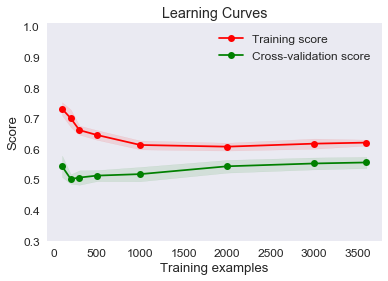

In [38]:
# Function to draw a learning curve for increasing training samples of the best model. Aids in analysis of the 
# bias-variance tradeoff. 

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=[100,200,300,500,1000,2000,3000,3600]):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, allDataFeats, allPred, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curves"# (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVMModel
plot_learning_curve(estimator, title, allDataFeats, allPred, (0.3, 1.01), cv=cv, n_jobs=4)
plt.savefig('learningCurve_RBFModel11_2.png')

plt.show()

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

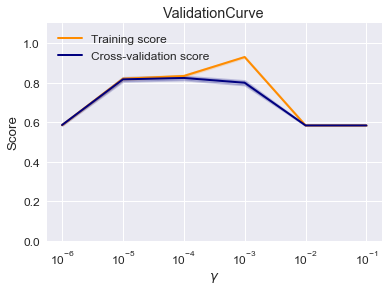

In [11]:
#Validation Curve generation - gamma

train_scores, valid_scores = validation_curve(SVMModel, pcaTrainCV, cvTrainPreds, "gamma",
                                              [0.000001,0.00001,0.0001,0.001,0.01,0.1])

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(valid_scores, axis=1)
val_scores_std = np.std(valid_scores, axis=1)

param_range = [0.000001,0.00001,0.0001,0.001,0.01,0.1]#np.logspace(-7, 3, 3) #change this based on parameters to test
plt.title('ValidationCurve')
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, val_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.savefig('ValidationCurve_Param_RBFModel11_2.png')
plt.show()

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

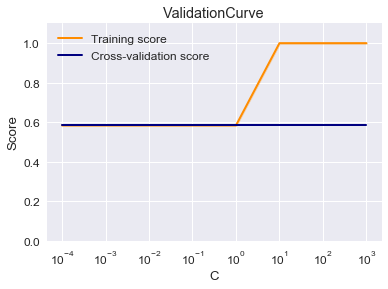

In [12]:
#Validation Curve generation - C

train_scores, valid_scores = validation_curve(SVMModel, pcaTrainCV, cvTrainPreds, "C",
                                              [0.0001,0.001,0.01,0.1,1,10,100,1000])

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(valid_scores, axis=1)
val_scores_std = np.std(valid_scores, axis=1)

param_range = [0.0001,0.001,0.01,0.1,1,10,100,1000]#np.logspace(-7, 3, 3) #change this based on parameters to test
plt.title('ValidationCurve')
plt.xlabel("C")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, val_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.savefig('ValidationCurve_Param_RBFModel11_2.png')
plt.show()